# 단순 선형회귀 (1차 회귀)

In [3]:
import numpy as np

x = np.array([[0.0],[1.0], [2.0]])
y = np.array([1.0,2.0,2.9])

In [2]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x,y)

print(lm)
print('기울기', lm.coef_)
print('y 절편', lm.intercept_)

LinearRegression()
기울기 [0.95]
y 절편 1.016666666666667


# 2차 다항식 설정

In [4]:
import numpy as np

# 랜덤 데이터 생성
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + np.random.randn(m,1) # 평균 0, 표준편차가 1인 가우시안 분포에서 m X n 만큼의 난수 생성

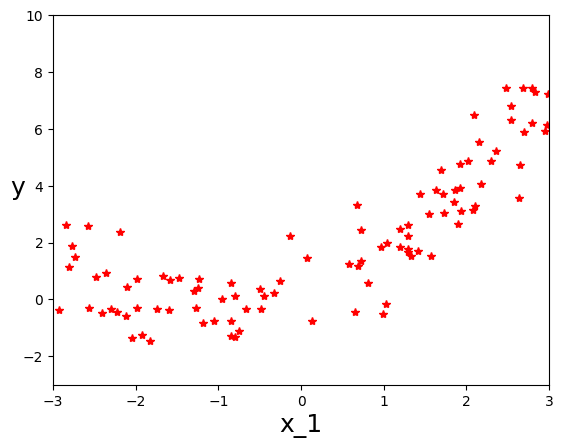

In [5]:
import matplotlib.pyplot as plt

plt.plot(X, y, "r*")
plt.xlabel("x_1", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([-3,3,-3,10])
plt.show()

# 다항식 변환

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 우리는 PolynomialFeatures()를 통해서 1차원의 데이터로 부터 2차원의 데이터를 생성할 예정임
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X) # X_poly = [X, X^2]

## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print('기울기', lin_reg.coef_) # X와 X^2의 coefficient 값 출력
print('절편', lin_reg.intercept_)

기울기 [[0.97227172 0.44946738]]
절편 [0.27614611]


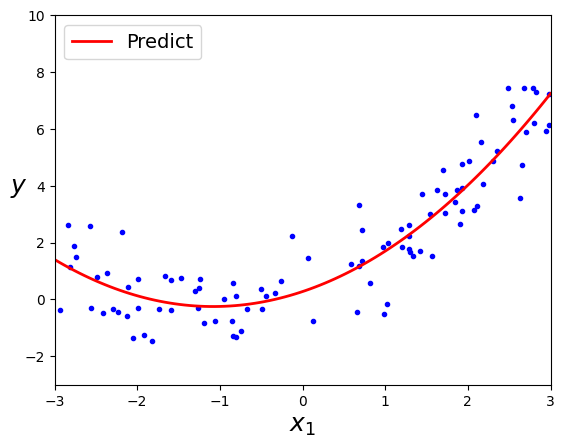

In [7]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)


plt.plot(X, y, "b.")

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predict")

plt.xlabel("$x_1$", fontsize=18) # 축 레이블 설정
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.axis([-3, 3, -3, 10]) # 축 범위 설정
plt.show()

# LinearRegression 예시

In [8]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn import datasets

https://drive.google.com/file/d/1eN_JdyeLOLIvMHi9bUrpgm21aCIsVcOV/view?usp=sharing

1. 링크로 들어가서 데이터 다운로드
2. 코랩 왼쪽 바에 파일 폴더 선택
3. sample data 폴더 우클릭 -> 업로드 선택
4. 다운로드 받은 데이터 업로드

In [10]:
boston_df = pd.read_csv('sample_data/boston.csv')

## 보스턴 집 값 예측 데이터

**Data Set Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.


In [11]:
boston_df.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [12]:
# 해석하기 어려운 column 이름은 편한대로 바꾸기
boston_df.rename(columns={'crim':'crime'}, inplace=True)

In [13]:
boston_df.head(3)

,crime,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


## Feature processing 없이 학습 진행

In [14]:
X = boston_df.drop(['medv'], axis=1)
y = boston_df[['medv']]

In [15]:
X

,crime,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [16]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1234)

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # 학습 진행

y_pred = lin_reg.predict(X_test) # 테스트 셋 가지고 확인


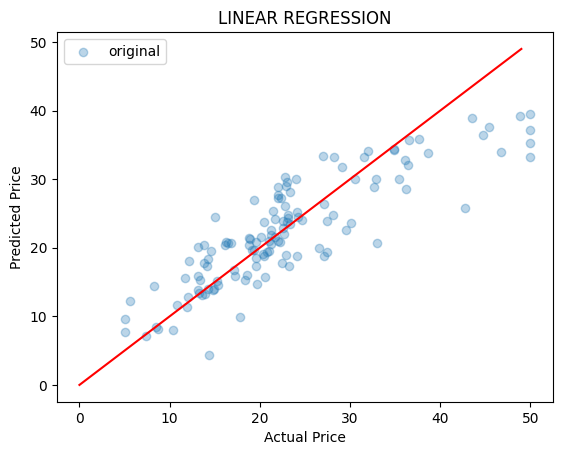

In [19]:
# y_test와 y_pred 에 대한 scatter plot 그리기
plt.plot(np.arange(50),color='red')
plt.scatter(y_test, y_pred, alpha=0.3,label='original')
plt.legend()
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

print('MSE test set (original) : ', mean_squared_error(y_test, y_pred))
print('RMSE test set (original) : ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE test set (original) :  27.34816768593545
RMSE test set (original) :  5.229547560347401


In [21]:
print('기울기', lin_reg.coef_)
print('절편', lin_reg.intercept_)

기울기 [[-9.70341820e-02  6.31133687e-02 -1.41118921e-02  2.84299322e+00
  -2.18920156e+01  2.41452999e+00  2.39658929e-03 -1.88925109e+00
   3.56352826e-01 -1.28011290e-02 -1.05894185e+00  1.01171710e-02
  -5.63174445e-01]]
절편 [50.82795891]


## Outlier 처리후 학습 진행

In [ ]:
boston_df.head(3)

In [ ]:
plt.scatter(boston_df['medv'],boston_df['rm'])
plt.show()

In [ ]:
feature = 'rm'
plt.hist(boston_df[feature],bins=30)
plt.show()

print('min :' , np.min(boston_df[feature]))
print('max :' , np.max(boston_df[feature]))
print('mean :' , np.mean(boston_df[feature]))
print('median :' , np.median(boston_df[feature]))
print('std :' , np.std(boston_df[feature]))

In [ ]:
boston_df[(boston_df['medv'] > 45) & (boston_df['rm'] < 8)]

In [26]:
filter_df = boston_df[~(boston_df['rm'] < 4)]
filter_df = filter_df[~((filter_df['medv'] > 45) & (filter_df['rm'] < 8))]

In [ ]:
filter_df

In [ ]:
X = filter_df.drop(['medv'], axis=1)
y = filter_df[['medv']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1234)

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # 학습 진행

y_pred = lin_reg.predict(X_test) # 테스트 셋 가지고 확인

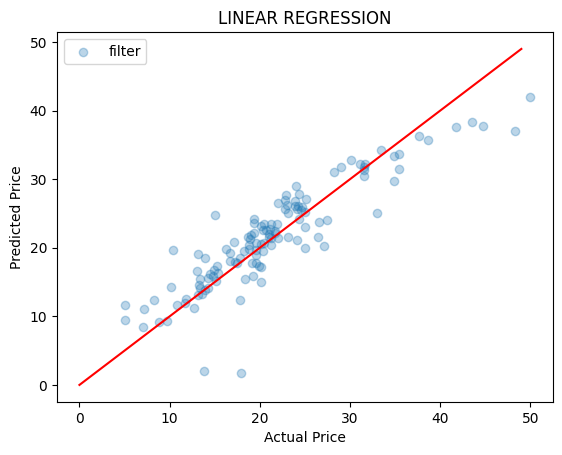

In [32]:
plt.plot(np.arange(50),color='red')
plt.scatter(y_test, y_pred, alpha=0.3,label='filter')
#plt.scatter(y_test_3, y_pred_3, alpha=0.3,label='scaling')
plt.legend()
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LINEAR REGRESSION")
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error

print('MSE test set (outlier filter) : ', mean_squared_error(y_test, y_pred))
print('RMSE test set (outlier filter) : ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE test set (outlier filter) :  14.221518845249863
RMSE test set (outlier filter) :  3.7711429096826685


In [ ]:
print('기울기',lin_reg.coef_)
print('절편',lin_reg.intercept_)

## Scaling 처리 후 학습 진행

**전체 Feature scaling으로 바꾸기**

In [ ]:
X = boston_df.drop(['medv'], axis=1)
y = boston_df[['medv']]

**실습 문제**  
X feature에 대해 MinMaxScaler 적용 후 학습 진행  

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 1. X feature에 대해 scaler 적용
# 2. train, test dataset 나누기
# 3. train dataset으로 LinearRegression 학습 진행
# 4. test dataset으로 LinearRegression 예측 진행
# 5. MSE, RMSE 값 출력
# 6. 학습된 LinearRegression의 기울기와 절편 출력
# 7. 실제 y 값과 예측된 y 값 plotting